<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/Lecture11_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from/Orginal notebook by: **Volodymyr Kuleshov**

## Part 1: The Kernel Trick: Motivation

So far, the majority of the machine learning models we have seen have been *linear*.

In this lecture, we will see a general way to make many of these models *non-linear*. We will use a new idea called *kernels*.

**Review: Linear Regression**

Recall that a linear model has the form
$$
 f(x) = \sum_{j=0}^d\theta_j\cdot x_j =\theta^\top x. 
$$
where $x$ is a vector of features and we used the notation $x_0 = 1$.

We pick $\theta$ to minimize the (L2-regularized) mean squared error (MSE). $$L(\theta) = \frac{1}{2n}\sum_{i=1}^n(y^{(i)} - \theta^\top x^{(i)}) + \frac{\lambda}{2}\sum_{j=1}^d\theta_j^2$$

**Review: Polynomial Regression**

Specifically, given a 1D continuous variable $x$, we can define a feature function $\phi: \mathbb{R} \to \mathbb{R}^{p+1}$ as 

$$
\phi(x) = 
\begin{bmatrix} 1 \\ x \\ x^2  \\ \vdots \\x^p \end{bmatrix} 
$$

The class of models of the form 

$$
f_\theta(x) :=\sum_{j=0}^p \theta_p x^p = \theta^\top \phi(x)
$$

**Towards general Non-Linear Features**

Any non-linear feature map $\phi(x):\mathbb{R} \to \mathbb{R}^p$ can be used to obtain general models of the form $f_\theta(x) := \theta^\top \phi(x)$ that are highly non-linear in $x$ but linear in $\theta$.

**The Featurized Design Matrix**

It is useful to represent the featurized dataset as a matrix $\Phi \in \mathbb{R}^{n \times p}$

**Featurized Normal Equations**

The normal equations provide a closed-form solution for $\theta$.

$$
\theta = (X^\top X + \lambda I)^{-1}X^\top y
$$

When the vectors of attributes $x^{(i)}$ are featurized, we can write this as 

$$
\theta = (\Phi^\top \Phi + \lambda I)^{-1}\Phi^\top y
$$

**Push-Through Matrix Identity**

We can modify this expression by using a version of the push-through matrix identity:

$$
(\lambda I + UV)^{-1}U = U(\lambda I + VU)^{-1}
$$

where $U \in \mathbb{R}^{n \times m}$ and $V \in \mathbb{R}^{m \times n}$ and $\lambda \neq 0$

Proof sketch: Start with $U (\lambda I + VU) = (\lambda I + UV)U$ and multiply both sides by $(\lambda I + VU)^{-1}$ on the right and $(\lambda I + UV)^{-1}$ on the left.

**Normal Equations: Dual Form**

We can apply the identity (\lambda I + UV)^{-1}U = U(\lambda I + VU)^{-1} to the normal equations with $U=\Phi^\top$ and $V=\Phi$.

$$
\theta = (\Phi^\top\Phi + \lambda I)^{-1}\Phi^\top y
$$

to obtain the *dual* form

$$
\theta = \Phi^\top(\Phi\Phi^\top + \lambda I)^{-1}y
$$

The first approach takes $\mathcal{O}(p^3)$ time; the second is $\mathcal{O}(n^3)$ as is faster when $p>n$.

## Part 2: Kernel method: An Example

Many ML algorithms can be written down as optimization problems in which the features $\phi(x)$ only appear as dot products $\phi(x)^T \phi(z)$ that can be computed efficiently.

Lets look at an example.

Can we compute the dot product $\phi(x)^T\phi(x')$ of polynomial features $\phi(x)$ more efficiently than using the standard definition of a dot product? 

To start, consider polynomial features $\phi: \mathbb{R}^d \to \mathbb{R}^{d^2}$ of the form

$$
\phi(x)_{ij} = x_i x_j \;\text{for}\; i,j \in \{1,2,\ldots,d\}
$$

**Definition: Kernels**

The *kernel* corresponding to features $\phi(x)$ is a function $K:\mathcal{X} \times \mathcal{X} \to [0,\infty]$ that outputs dot products between vectors in $\mathcal{X}$

$$
 K(x,z) = \phi(x)^T \phi(z)
$$

Kernels have various interpretations:
 - The dot product or geomerical angle between $x$ and $z$
 - a notion of similarity between $x$ and $z$

In order to illustrate kernels, we will use this dataset.

(-3.0, 3.0)

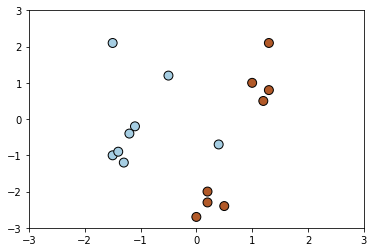

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

%matplotlib inline

# our dataset and targets
X = np.c_[(.4, -.7), (-1.5, -1), (-1.4, -.9), (-1.3, -1.2), (-1.1, -.2), (-1.2, -.4), (-.5, 1.2), (-1.5, 2.1), (1, 1),
          (1.3, .8), (1.2, .5), (.2, -2), (.5, -2.4), (.2, -2.3), (0, -2.7), (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

x_min, x_max = -3, 3
y_min, y_max = -3, 3
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k', s=80)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

**Example: Linear Kernel**

The simplest kind of kernel that exists is called the linear kernel. This simply corresponds to dot product multiplication of the features.

$$
K(x,z) = x^Tz
$$

Applied to an SVM, this corresponds to a linear decision boundary.

Below is an example of how we can use the SVM implementation in `sklearn` with a linear kernel.

Internally, this solves the dual SVM optimization problem.

(-3.0, 3.0)

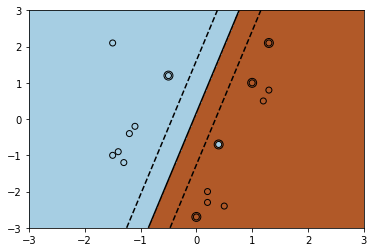

In [10]:
clf = svm.SVC(kernel='linear', gamma=2)
clf.fit(X,Y)

# plot the line, the points, and the nearest vectos to the plane
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80,zorder=10,facecolors='none',edgecolors='k')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired,zorder = 10, edgecolor='k')
XX,YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap = plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k','k','k'],linestyles=['--','-','--'],levels=[-0.5,0,0.5])
_